In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [73]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [74]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [75]:
df.shape

(9134, 24)

In [120]:
df.rename(columns = {'employmentstatus' : 'employment status'}, inplace = True)
df.columns = df.columns.str.lower()
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,0,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,1,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,2,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,3,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,4,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,9129,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,9130,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,9131,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,9132,691.200000,Four-Door Car,Large


In [121]:
df.select_dtypes(include='number').dtypes

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
sales channel                      int64
total claim amount               float64
dtype: object

In [122]:
#check what columns have nan values and how much of them in each one 
df.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [123]:
#1 Show dataframe info

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [125]:
#2 Describe Dataframe

In [133]:
df.describe(include = 'all')

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134.000000,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,NaN,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,NaN,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,NaN,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,4566.500000,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,2636.903013,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,2283.250000,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,4566.500000,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,6849.750000,547.514839,NaN,NaN


In [134]:
#dataframe description transposed looks better 
df.describe(include = 'all') .T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment status,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [127]:
#3 Show a plot of the total number of responses

In [128]:
df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

<AxesSubplot:>

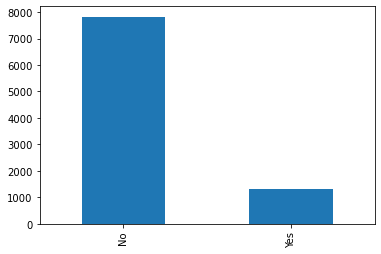

In [98]:
#to make more sense to analyze, I preferred to show a plot of the total responses per "Yes" and "No" answers
df['response'].value_counts().plot(kind='bar')

In [93]:
#4 Show a plot of the response rate by the sales channel.

<AxesSubplot:>

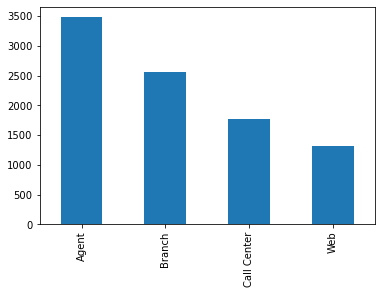

In [99]:
df['sales channel'].value_counts().plot(kind='bar')

In [ ]:
#5 Show a plot of the response rate by income.

<AxesSubplot:xlabel='response', ylabel='income'>

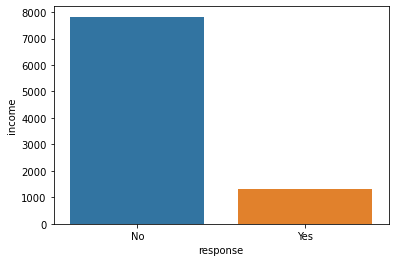

In [144]:
sns.barplot(x='response', y='income', data = df, estimator=len)

In [100]:
#6 Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='response', ylabel='total claim amount'>

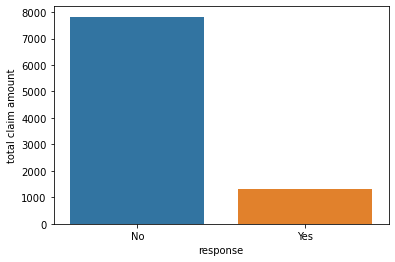

In [146]:
sns.barplot(x='response', y='total claim amount', data = df, estimator=len)